# Riconoscere i fiori: Conv2D

Abbiamo due tipi di fiori, costruiamo una rete convoluzionale che li classifichi.
<br>
Questo script è la traduzion in Python di un esempio in R di *Valentina Porcu* per il suo corso sul deep learning su *Udemy*.

In [17]:
import tensorflow.keras as keras

Creiamo gli oggetti che contengono gli indirizzi delle cartelle

In [2]:
train_dir = '/yourPath/fiori/train'
test_dir = '/yourPath/fiori/test'
validation_dir = '/yourPath/fiori/validation'

effettuiamo il rescaling delle immagini del train e del validation set

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)
validation_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)

In [8]:
train_generator = keras.preprocessing.image.ImageDataGenerator.flow_from_directory(
        train_datagen,
        directory=train_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = "binary")

validation_generator = keras.preprocessing.image.ImageDataGenerator.flow_from_directory(
        validation_datagen,
        directory=validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = "binary")

Found 800 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


inizializziamo e costruiamo il modello

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import RMSprop

In [62]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 512, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

In [63]:
model.compile(loss = "binary_crossentropy",
        optimizer = RMSprop(lr = 1e-4),
        metrics = ["accuracy"])

In [64]:
history = model.fit_generator(train_generator,
        steps_per_epoch = 100,
        epochs = 10,
        validation_data = validation_generator,
        validation_steps = 50)

Epoch 1/10
100/100 [==============================] - 68s 677ms/step - loss: 0.5436 - accuracy: 0.7215 - val_loss: 0.5619 - val_accuracy: 0.6850
Epoch 2/10
100/100 [==============================] - 86s 862ms/step - loss: 0.3938 - accuracy: 0.8325 - val_loss: 0.5063 - val_accuracy: 0.7300
Epoch 3/10
100/100 [==============================] - 73s 731ms/step - loss: 0.3401 - accuracy: 0.8530 - val_loss: 0.4964 - val_accuracy: 0.7500
Epoch 4/10
100/100 [==============================] - 73s 725ms/step - loss: 0.2982 - accuracy: 0.8700 - val_loss: 0.3899 - val_accuracy: 0.8600
Epoch 5/10
100/100 [==============================] - 88s 879ms/step - loss: 0.2590 - accuracy: 0.8975 - val_loss: 0.3860 - val_accuracy: 0.8100
Epoch 6/10
100/100 [==============================] - 78s 780ms/step - loss: 0.2126 - accuracy: 0.9160 - val_loss: 0.3862 - val_accuracy: 0.8400
Epoch 7/10
100/100 [==============================] - 72s 717ms/step - loss: 0.1873 - accuracy: 0.9280 - val_loss: 0.3804 - val_ac

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

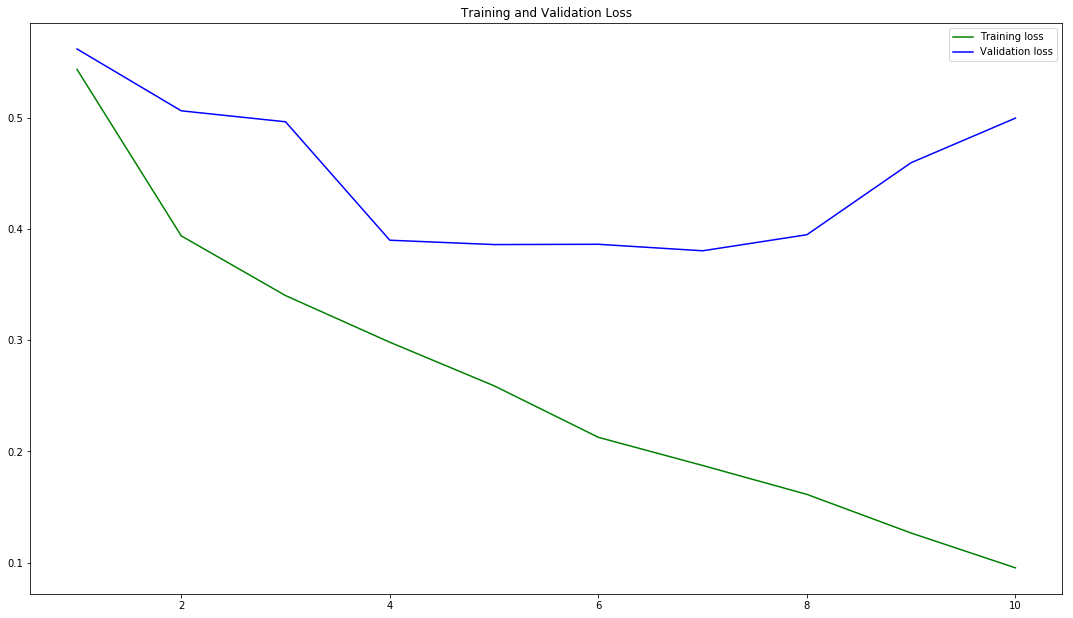

In [66]:

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(epochs, loss, 'b', color='green', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', color = 'blue', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

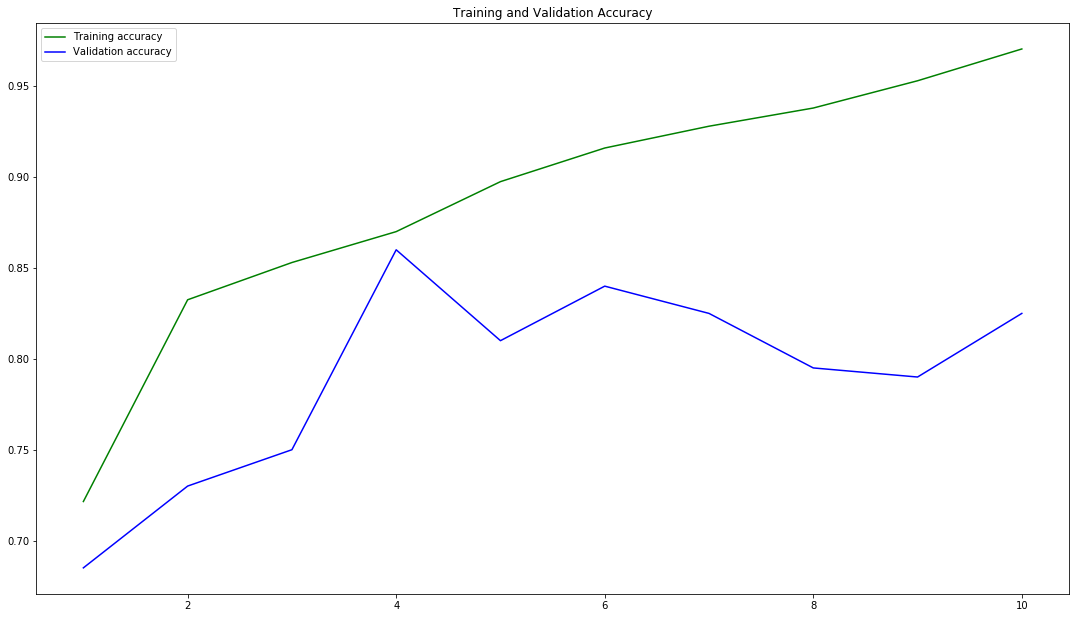

In [67]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.figure()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(epochs, loss, 'b', color='green', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'b', color = 'blue', label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [68]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255)
test_generator = keras.preprocessing.image.ImageDataGenerator.flow_from_directory(
        test_datagen,
        directory=test_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = "binary")

Found 400 images belonging to 2 classes.


Valutiamo sul test, la prima cifra è il loss la seconda accuracy

In [69]:
model.evaluate_generator(test_generator, steps=50)

[0.5148152837157249, 0.813]

carichiamo un'immagine per ognuna delle due tipologie di fiori in test

In [70]:
img = keras.preprocessing.image.load_img('/home/nico/Scrivania/fiori/test/daisy/21652746_cc379e0eea_m.jpg', target_size = (150, 150))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape(1, 150, 150, 3)

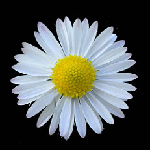

In [71]:
img

Se l'output del metodo predict è 0 allora ha catturato una margherita, altrimenti un tulipano

In [72]:
model.predict(img_array)

array([[0.]], dtype=float32)

In [73]:
img2 = keras.preprocessing.image.load_img('/home/nico/Scrivania/fiori/test/tulip/17146928665_600fa3a1f1_n.jpg', target_size = (150, 150))
img2_array = keras.preprocessing.image.img_to_array(img2)
img2_array = img_array2.reshape(1, 150, 150, 3)

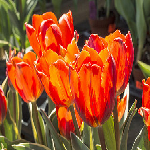

In [74]:
img2

In [75]:
model.predict(img2_array)

array([[1.]], dtype=float32)

### In questo caso ha predetto bene nonostante l'overfitting!